### libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
from sklearn.cluster import SpectralClustering
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### read in data

In [4]:
url = "https://raw.githubusercontent.com/nedeinlein/Machine_Learning_I/main/runs_clean.csv"
runs_df = pd.read_csv(url, index_col=False)
print('Data set shape:',runs_df.shape)
runs_df.head()

Data set shape: (79423, 29)


,Unnamed: 0,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,...,behind_sec2,behind_sec3,time1,time2,time3,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,...,2.00,1.50,13.85,21.59,23.86,83.92,9.7,3.7,118,2
1,1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,...,9.00,5.00,14.57,21.99,23.30,83.56,16.0,4.9,164,57
2,2,0,3,858,7,0.0,4.75,3,NZ,Gelding,...,1.00,0.75,13.69,21.59,23.90,83.40,3.5,1.5,137,18
3,3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,...,5.00,3.50,14.09,21.83,23.70,83.62,39.0,11.0,80,59
4,4,0,5,2796,6,0.0,3.75,3,GB,Gelding,...,8.75,4.25,14.77,21.75,23.22,83.24,50.0,14.0,9,154


### create show variable

In [5]:

runs_df['show'] = np.where(runs_df['result'] <= 3, 1, 0)
runs_df.head()

,Unnamed: 0,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,...,behind_sec3,time1,time2,time3,finish_time,win_odds,place_odds,trainer_id,jockey_id,show
0,0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,...,1.50,13.85,21.59,23.86,83.92,9.7,3.7,118,2,0
1,1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,...,5.00,14.57,21.99,23.30,83.56,16.0,4.9,164,57,0
2,2,0,3,858,7,0.0,4.75,3,NZ,Gelding,...,0.75,13.69,21.59,23.90,83.40,3.5,1.5,137,18,0
3,3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,...,3.50,14.09,21.83,23.70,83.62,39.0,11.0,80,59,0
4,4,0,5,2796,6,0.0,3.75,3,GB,Gelding,...,4.25,14.77,21.75,23.22,83.24,50.0,14.0,9,154,0


### Remove variables that are not needed/useful for the analysis

In [7]:
runs_data = runs_df.drop(['Unnamed: 0','race_id','horse_id','result','won','lengths_behind','horse_gear','position_sec1','position_sec2','position_sec3','behind_sec1','behind_sec2','behind_sec3','time1','time2','time3','finish_time','trainer_id','jockey_id','show'], axis=1)
runs_target = runs_df['won']
runs_target2 = runs_df['show']
print('Predictor data set shape after dropping non-important predictors \nand separating response variables into their own data sets: \n',runs_data.shape)
runs_data.head()

Predictor data set shape after dropping non-important predictors 
and separating response variables into their own data sets: 
 (79423, 10)


,horse_no,horse_age,horse_country,horse_type,horse_rating,declared_weight,actual_weight,draw,win_odds,place_odds
0,1,3,AUS,Gelding,60,1020.0,133,7,9.7,3.7
1,2,3,NZ,Gelding,60,980.0,133,12,16.0,4.9
2,3,3,NZ,Gelding,60,1082.0,132,8,3.5,1.5
3,4,3,SAF,Gelding,60,1118.0,127,13,39.0,11.0
4,5,3,GB,Gelding,60,972.0,131,14,50.0,14.0


### One-Hot Encode Categorical Variables

In [8]:
tmp_df = pd.get_dummies(runs_data.horse_country,prefix='horse_country')
runs_df_onehot = pd.concat((runs_data,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(runs_data.horse_type,prefix='horse_type')
runs_df_onehot = pd.concat((runs_df_onehot,tmp_df),axis=1) # add back into the dataframe

runs_data = runs_df_onehot.reset_index(drop=True)
runs_data = runs_data.drop(['horse_country','horse_type'], axis=1)

print('Shape after One-Hot Encoding Categorical Predictors:',runs_data.shape)
runs_data.head()

Shape after One-Hot Encoding Categorical Predictors: (79423, 33)


,horse_no,horse_age,horse_rating,declared_weight,actual_weight,draw,win_odds,place_odds,horse_country_ARG,horse_country_AUS,...,horse_country_ZIM,horse_type_Brown,horse_type_Colt,horse_type_Filly,horse_type_Gelding,horse_type_Grey,horse_type_Horse,horse_type_Mare,horse_type_Rig,horse_type_Roan
0,1,3,60,1020.0,133,7,9.7,3.7,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2,3,60,980.0,133,12,16.0,4.9,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,3,60,1082.0,132,8,3.5,1.5,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,3,60,1118.0,127,13,39.0,11.0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,3,60,972.0,131,14,50.0,14.0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
#train test split won
X_train,X_test,Y_train,Y_test = train_test_split(runs_data,runs_target,test_size=0.20,random_state=0)
mmscl_obj = MinMaxScaler()
X_train = mmscl_obj.fit_transform(X_train,y = None)
X_test = mmscl_obj.transform(X_test)

### K-means clustering using PCA

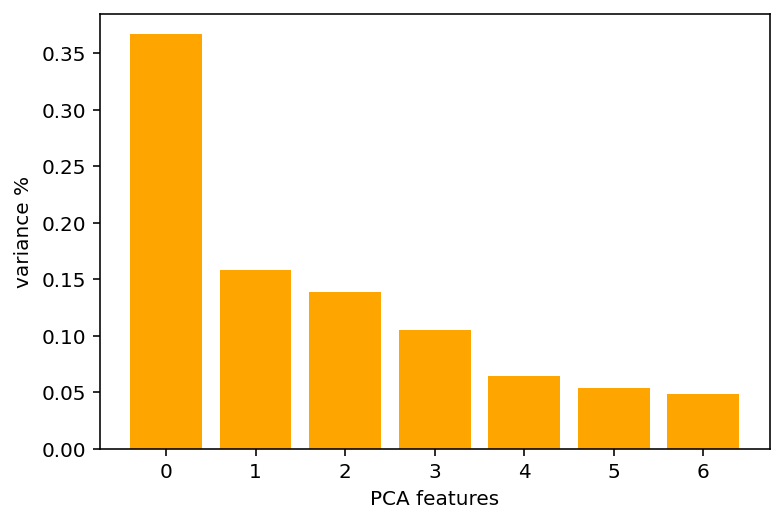

In [12]:
#https://medium.com/more-python-less-problems/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
from sklearn.preprocessing import MinMaxScaler

#creating pca's
pca_data = runs_df[['lengths_behind','horse_age','horse_rating','declared_weight','actual_weight','draw','position_sec1','position_sec2','position_sec3','behind_sec1','behind_sec2','behind_sec3','time1','time2','time3','finish_time','win_odds','place_odds']]
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(pca_data)
pca = PCA(n_components = .90)
x_pca = pca.fit(data_rescaled).transform(data_rescaled)
pd.DataFrame(x_pca).head()

#plotting
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='orange')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

#saving components into dataframe
PCA_components = pd.DataFrame(x_pca)

Text(0, 0.5, 'PCA 2')

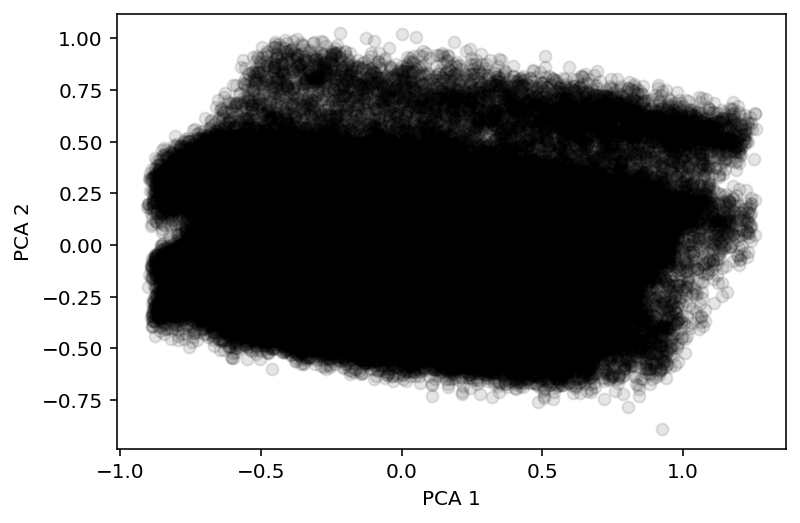

In [13]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

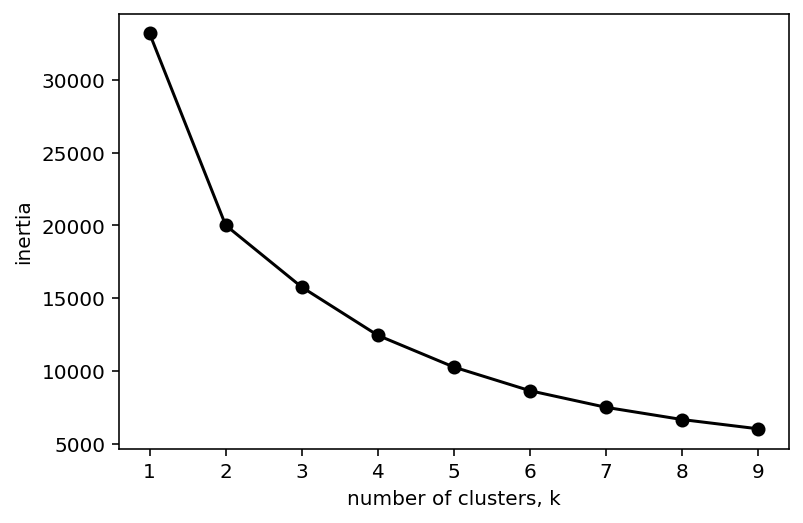

elbow point is at k=2
At k=2, the change in the value of inertia is less significant moving forward.


In [14]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, init = "k-means++")
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
print('elbow point is at k=2')
print('At k=2, the change in the value of inertia is less significant moving forward.')

In [19]:
# k means
kmeans = KMeans(n_clusters=2, random_state=0)
PCA_components['cluster'] = kmeans.fit_predict(PCA_components[[0,1]])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
# add to PCA_components
PCA_components['cen_x'] = PCA_components.cluster.map({0:cen_x[0], 1:cen_x[1]})
PCA_components['cen_y'] = PCA_components.cluster.map({0:cen_y[0], 1:cen_y[1]})
# define and map colors
colors = ['#d62728', '#81DF20']
PCA_components['c'] = PCA_components.cluster.map({0:colors[0], 1:colors[1]})

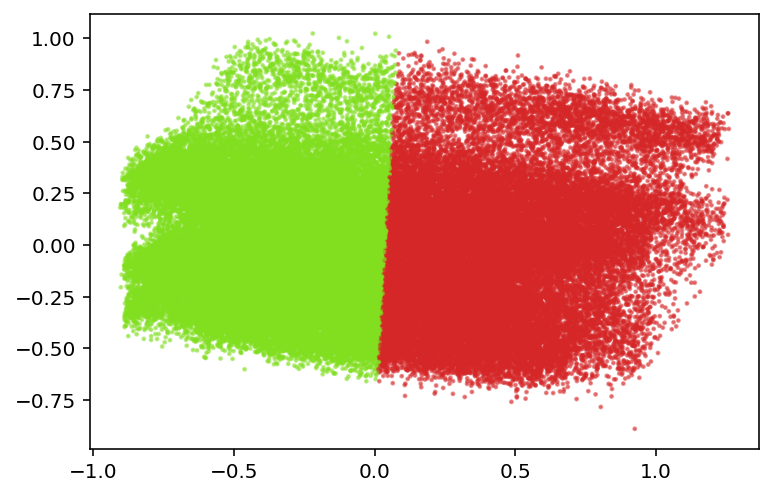

In [20]:
plt.scatter(PCA_components[0], PCA_components[1], c=PCA_components.c, alpha = .5, s=2)

### Second Cluster - Spectral

In [21]:
runs_data.head()

,horse_no,horse_age,horse_rating,declared_weight,actual_weight,draw,win_odds,place_odds,horse_country_ARG,horse_country_AUS,...,horse_country_ZIM,horse_type_Brown,horse_type_Colt,horse_type_Filly,horse_type_Gelding,horse_type_Grey,horse_type_Horse,horse_type_Mare,horse_type_Rig,horse_type_Roan
0,1,3,60,1020.0,133,7,9.7,3.7,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2,3,60,980.0,133,12,16.0,4.9,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,3,60,1082.0,132,8,3.5,1.5,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,3,60,1118.0,127,13,39.0,11.0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,3,60,972.0,131,14,50.0,14.0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Taking a random sample of 2500 rows to not kill computer

In [56]:
np.random.shuffle(X_train)
spcsample = X_train[:2500, :]
print(spcsample)

[[0.30769231 0.125      0.390625   ... 0.         0.         0.        ]
 [0.46153846 0.25       0.46875    ... 0.         0.         0.        ]
 [0.69230769 0.375      0.421875   ... 0.         0.         0.        ]
 ...
 [0.         0.125      0.390625   ... 0.         0.         0.        ]
 [0.53846154 0.375      0.5625     ... 0.         0.         0.        ]
 [0.30769231 0.         0.3359375  ... 0.         0.         0.        ]]


   Spectral Cluster Scatterplot with 5 Clusters


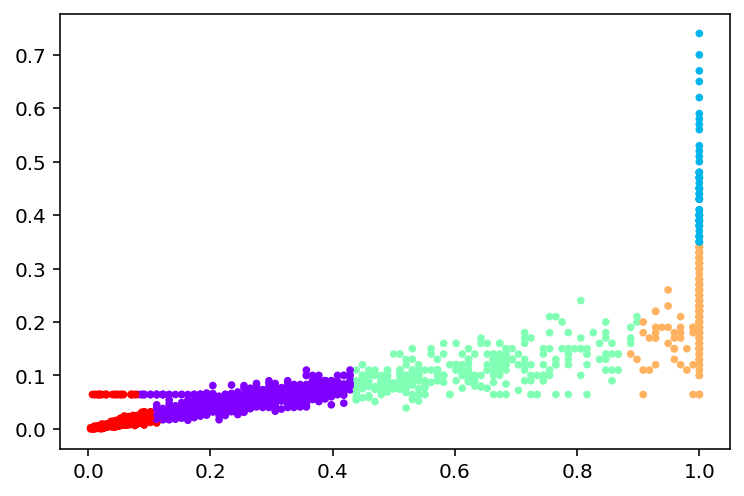

Time for spectral clustering:
Wall time: 691 ms


SpectralClustering(n_clusters=5)

In [80]:
X1 = spcsample[:,[6,7]]
nclust = 5

spc = SpectralClustering(n_clusters=nclust, affinity = 'rbf')
labels = spc.fit_predict(X1)

plt.scatter(X1[:,0], X1[:,1], c=labels,
                    cmap=plt.cm.rainbow, s=8)
print('   Spectral Cluster Scatterplot with', nclust, 'Clusters:')
plt.show()

print('Time for spectral clustering:')
%time spc.fit(X1)

In [82]:
yhat= spc.fit_predict(X_test)
prec = mt.precision_score(Y_test,yhat,average='micro')
auc = roc_auc_score(Y_test,yhat)
print(prec)
print(auc)

## Deployment Section

#### 1) Did you achieve your goals? If not, can you reign in the utility of your modeling?

#### 2) How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?

#### 3) How would your deploy your model for interested parties?

We would want to deploy this model to horse betters who are interested in a data-driven advantage. Through a website, we could reach Hong Kong's horse betters who would be the primary audience. As more data is collected from the races that fire on a daily basis, we can update our model to contain the latest data. 

#### 4) What other data should be collected? 

By collecting data from more than just the two Hong Kong race tracks where this dataset is from, we can expand our reach to a larger target audience of horse betters. The features given in this horse racing dataset are probably the most important features in determining how fast a horse can run, however there are other important features such as rest time between races and previous injuries that could be collected.

#### 5)How often would the model need to be updated, etc.?

Quite frequently new horses enter into the horse racing scene, and others retire. Being able to have the most up-to-date information is important to horse betters, and we would therefore update the model on a daily basis to predict the next day's horse races. 